# Reconstruction of 3D points and fixation on workspace

## Loading raw data

In [1]:
import random

# import
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import random
from utils.loading import load_patient_data, load_dataset
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams.update({'text.usetex': True, 'mathtext.fontset': 'stixsans'})

In [3]:
lpr_path = Path("/home/pl/MVA/Medic/data/LCR")
control_path = Path("/home/pl/MVA/Medic/data/Contrôle")

In [28]:
data_patient = load_dataset(lpr_path, nrows=50000)
data_control = load_dataset(control_path, nrows=50000)

Loading Contrôle dataset: 100%|██████████| 12/12 [01:01<00:00,  5.12s/ files]


In [5]:
list_patient = [key for key in data_patient.keys()]
list_control = [key for key in data_control.keys()]

In [6]:
data_patient[list_patient[0]][data_patient[list_patient[0]]["Eye movement type"] == "Fixation"]

,Recording timestamp,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Gyro X,Gyro Y,Gyro Z,Accelerometer X,Accelerometer Y,Accelerometer Z
1193,4336650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,470.0,1.0,1054.0,723.0,NaN,NaN,NaN,-1.2945,-8.2957,4.3527
1194,4339275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,470.0,1.0,1054.0,723.0,12.53,-36.6474,11.5213,NaN,NaN,NaN
1195,4340686,1092.0,725.0,-829.1038,-803.9995,6496.8921,-0.12668,-0.12011,0.98465,-0.12322,...,470.0,1.0,1054.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
1196,4346590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,470.0,1.0,1054.0,723.0,NaN,NaN,NaN,-1.3729,-8.5025,4.3959
1197,4349951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,470.0,1.0,1054.0,723.0,14.14,-32.7913,10.2110,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9952,34074894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,49.0,929.0,413.0,-15.05,8.9727,-6.9474,NaN,NaN,NaN
9953,34075520,935.0,415.0,41.5289,556.5410,3823.4348,0.01726,0.14855,0.98875,0.00410,...,60.0,49.0,929.0,413.0,NaN,NaN,NaN,NaN,NaN,NaN
9954,34081841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,49.0,929.0,413.0,NaN,NaN,NaN,-1.0983,-10.0916,-0.8235
9955,34085520,931.0,419.0,56.1582,544.5472,3825.0918,0.02518,0.13725,0.99022,0.00366,...,60.0,49.0,929.0,413.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2D plotting : example on one patient and one control

In [7]:
patient = list_patient[0]
control = list_control[0]

In [32]:
def get_fixation_df(data: pd.DataFrame, name: str):
    """Get the fixation points on the screen (in pixels)"""
    df = data[name][data[name]["Eye movement type"] == "Fixation"][["Recording timestamp", "Fixation point X", "Fixation point Y"]].drop_duplicates(subset=["Fixation point X", "Fixation point Y"], keep="first")
    df["Recording timestamp"] /= df["Recording timestamp"].max()
    return df

In [37]:
gaze_points_2D = get_fixation_df(data_patient, patient)

gaze_points_2D_control = get_fixation_df(data_control, control)

### 2D Plotting : comparison

In [38]:
from utils.plot import plot_patient_vs_control

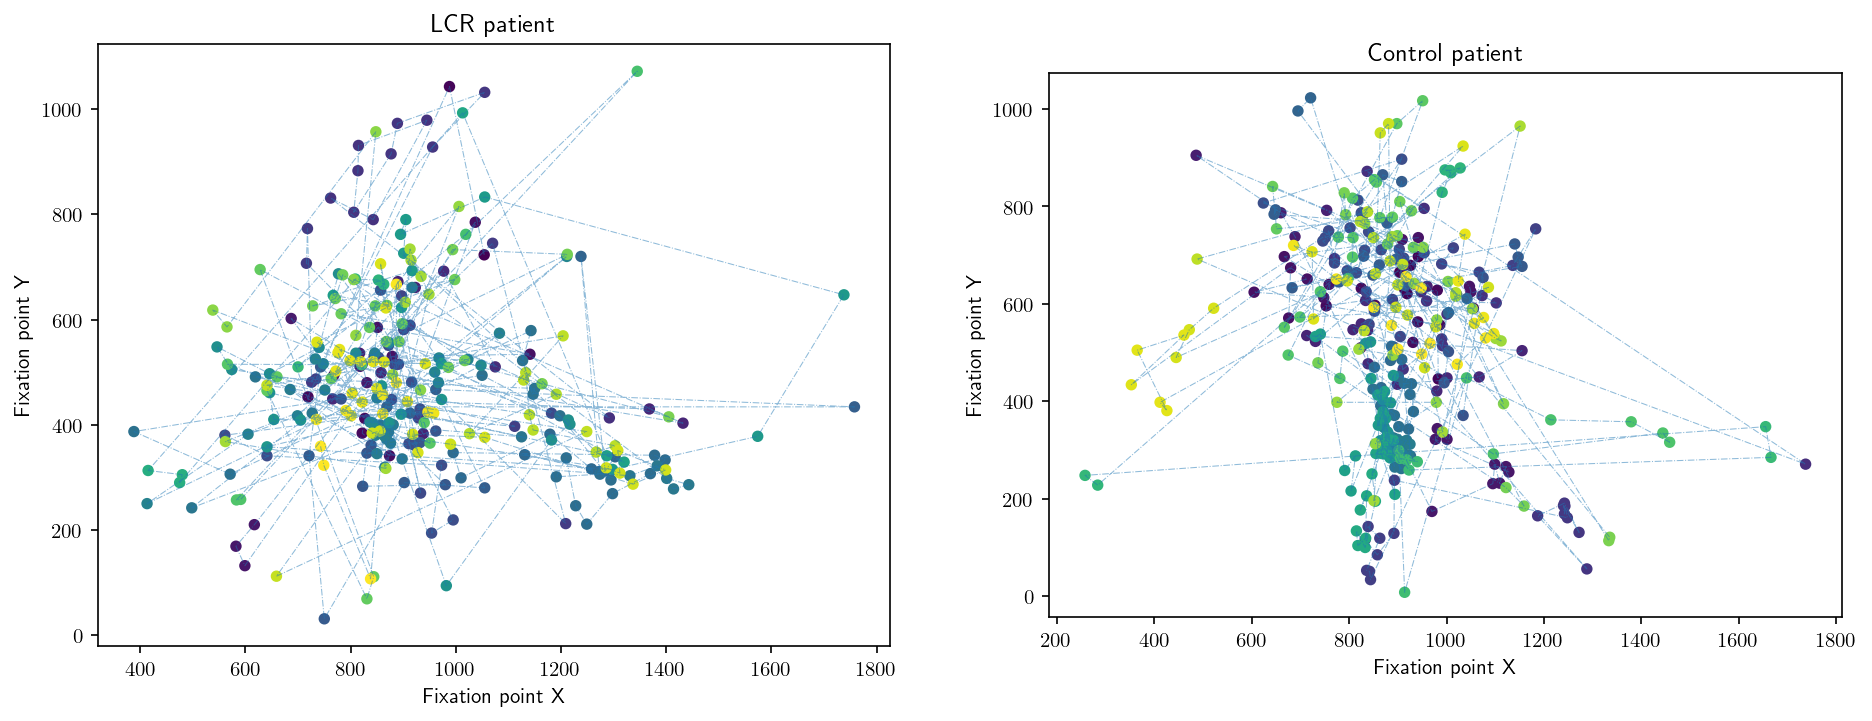

In [36]:
plot_patient_vs_control(gaze_points_2D, gaze_points_2D_control, show_lines=True)

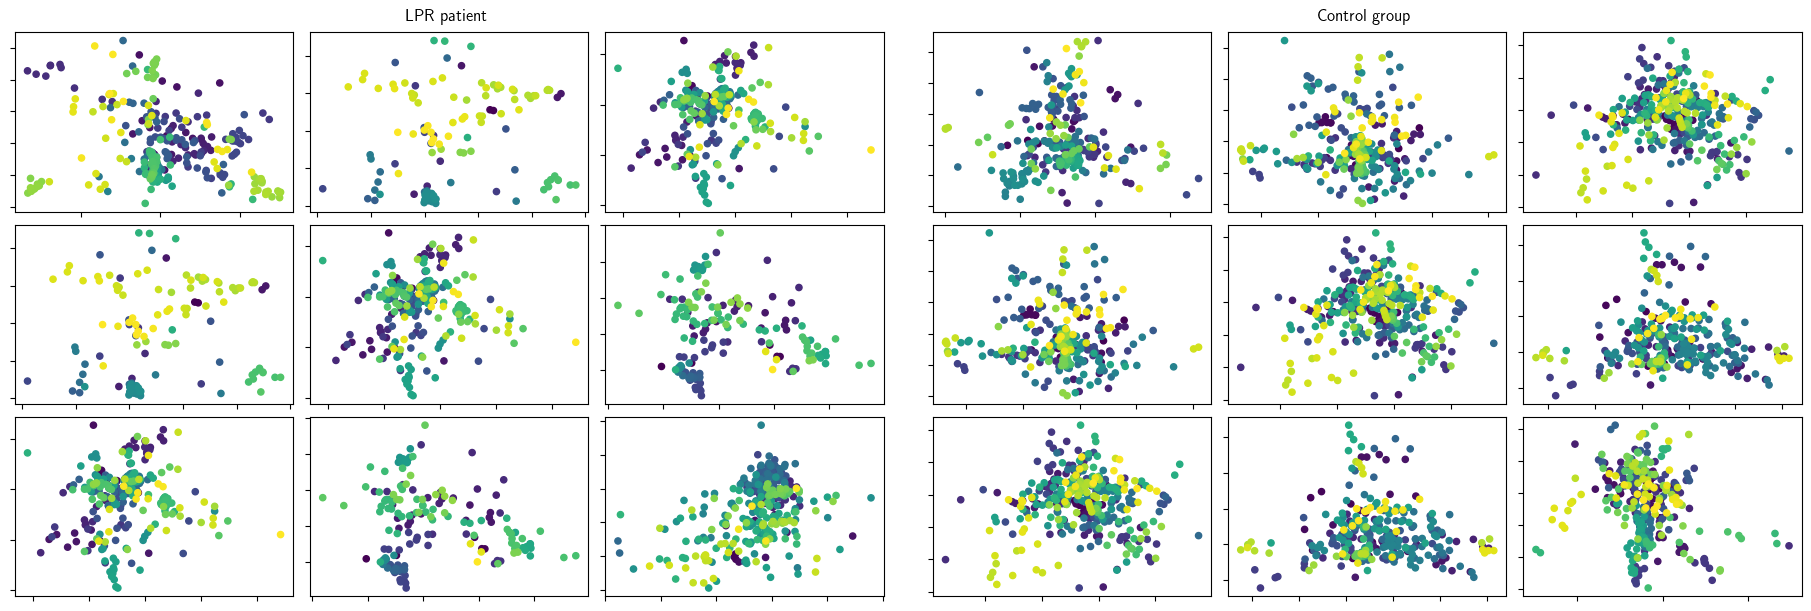

In [39]:
n_sample = 9
nrows = 3
ncols = n_sample // nrows
patients = random.sample(list_patient, n_sample)
controls = random.sample(list_control, n_sample)

fig = plt.figure(constrained_layout=True, figsize=(18,6))
subfigs = fig.subfigures(1, 2, wspace=0.04)

axsLeft = subfigs[0].subplots(nrows=nrows,ncols=ncols)
for i,axs in enumerate(axsLeft):
    for j,ax in enumerate(axs):
        gaze_points_2D = get_fixation_df(data_patient, patients[i+j])
        gaze_points_2D.plot.scatter(ax=ax, x="Fixation point X", y="Fixation point Y", c="Recording timestamp",cmap='viridis', colorbar=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
subfigs[0].suptitle("LPR patient")

axsRight = subfigs[1].subplots(nrows=nrows, ncols=ncols)
for i,axs in enumerate(axsRight):
    for j,ax in enumerate(axs):
        gaze_points_2D_control = get_fixation_df(data_control, controls[i+j])
        gaze_points_2D_control.plot.scatter(ax=ax, x="Fixation point X", y="Fixation point Y", c="Recording timestamp",cmap='viridis', colorbar=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
_ = subfigs[1].suptitle("Control group")

### 3D plotting

In [40]:
from matplotlib import cm

In [41]:
gaze_points_3D = data_patient[patient][["Recording timestamp", "Gaze point 3D X", "Gaze point 3D Y", "Gaze point 3D Z"]].dropna()
gaze_points_3D_control = data_control[control][["Recording timestamp", "Gaze point 3D X", "Gaze point 3D Y", "Gaze point 3D Z"]].dropna()

In [42]:
gaze_points_3D["Recording timestamp"] /= gaze_points_3D["Recording timestamp"].max()
gaze_points_3D_control["Recording timestamp"] /= gaze_points_3D_control["Recording timestamp"].max()

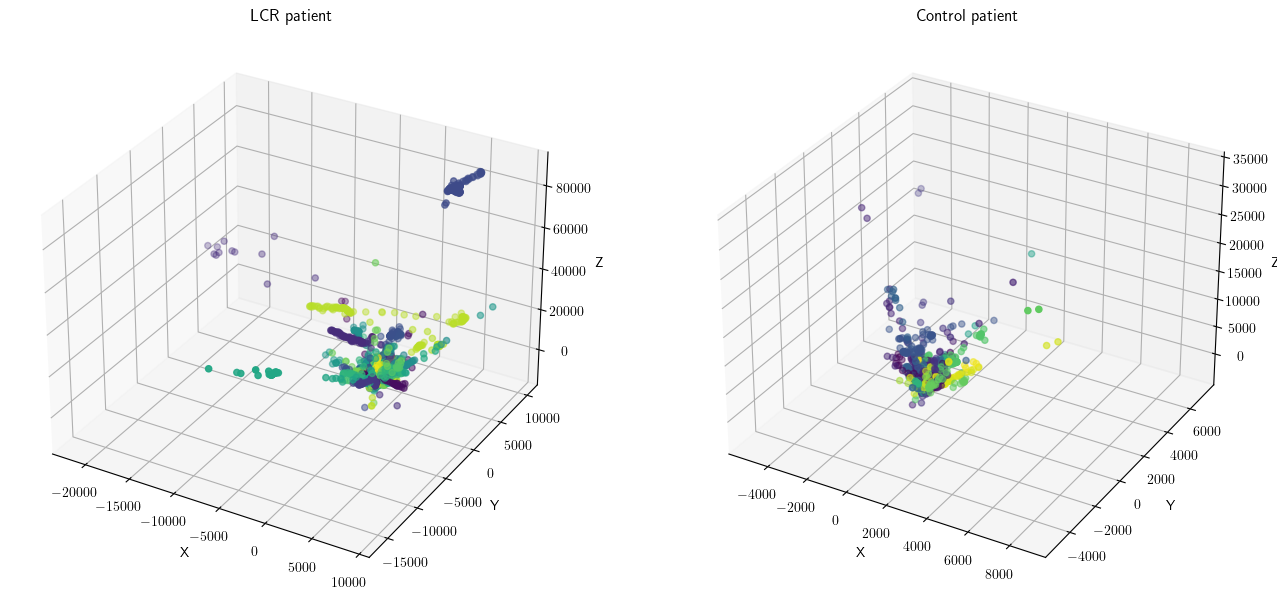

In [43]:
# 3D plotting
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.set_title("LCR patient")
x = gaze_points_3D["Gaze point 3D X"]
y = gaze_points_3D["Gaze point 3D Y"]
z = gaze_points_3D["Gaze point 3D Z"]
c = gaze_points_3D["Recording timestamp"]
cmap = cm.ap = cm.viridis
cb = ax.scatter(x, y, z, c=c, cmap=cmap)
ax.set_ylabel('Y')
ax.set_xlabel('X')
_ = ax.set_zlabel('Z')

ax = fig.add_subplot(1,2,2,projection='3d')
ax.set_title("Control patient")
x = gaze_points_3D_control["Gaze point 3D X"]
y = gaze_points_3D_control["Gaze point 3D Y"]
z = gaze_points_3D_control["Gaze point 3D Z"]
c = gaze_points_3D_control["Recording timestamp"]
cmap = cm.ap = cm.viridis
cb = ax.scatter(x, y, z, c=c, cmap=cmap)
ax.set_ylabel('Y')
ax.set_xlabel('X')
_ = ax.set_zlabel('Z')

### Fixation analysis